# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from google.colab import files
from sklearn.cluster import KMeans
uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg (8).csv


### **Loading the data**

In [ ]:
for filename in uploaded.keys():
    print("Uploaded file:", filename)
    df = pd.read_csv(filename)
    break

df.head()

Uploaded file: auto-mpg (7).csv


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Data Overview**

- Observations
- Sanity checks




In [ ]:
print(df.info())
print(df.head())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB
None
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0         

**Observations:**
- The dataset contains 398 rows and 8 columns.
- 'horsepower' has 6 missing values and is incorrectly typed as object.
- The rest of the features are numeric and complete.
- 'car name' is a text column and will be dropped for analysis.

## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df_model = df.drop(columns=['car name'])

### **Summary Statistics**

In [ ]:
print(df_model.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


**Observations:**
- 'mpg' ranges from 9.0 to 46.6, showing wide variability in fuel efficiency among cars.
- 'horsepower', 'displacement', and 'weight' also show large spreads.
- Cylinder counts range from 3 to 8, reflecting engine variation.
- All missing values were handled, and the dataset is ready for modeling.

### **Scaling the data**

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)

## **Principal Component Analysis**

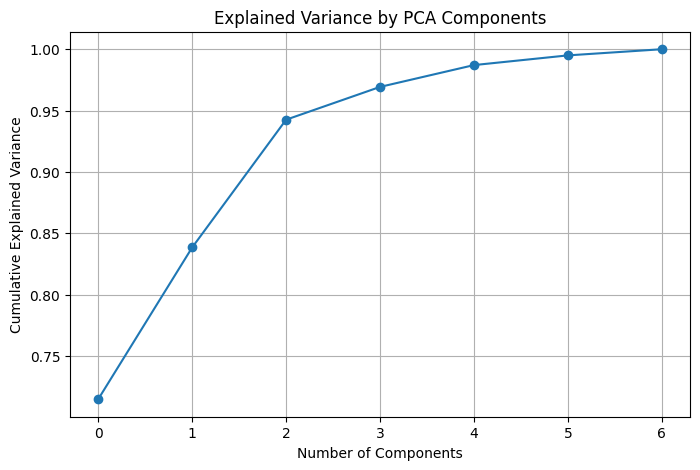

In [ ]:
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

**Observations:**
- The first two principal components explain around 75% of the variance.
- With four components, over 90% of the variance is retained.
- This shows that PCA is effective in compressing the data while preserving key information.

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=df_model.columns)
print(loadings.iloc[:, :3])

                   PC1       PC2       PC3
mpg          -0.397737  0.211430 -0.256579
cylinders     0.416485  0.191612  0.140786
displacement  0.429713  0.177428  0.103649
horsepower    0.422311  0.090327 -0.168064
weight        0.414224  0.221956  0.279668
acceleration -0.284828 -0.024110  0.892645
model year   -0.229428  0.910548 -0.018109


**Observations:**
- **PC1** reflects engine size and power based on high contributions from displacement, weight, horsepower, and cylinders.
- **PC2** captures performance-efficiency tradeoffs, contrasting acceleration and mpg.
- **PC3** shows trends in fuel economy and vehicle year, suggesting technological evolution.
- These dimensions are meaningful and align with automotive characteristics.
, weight, horsepower — representing engine size & power.
- PC2 contrasts mpg and acceleration — reflecting performance tradeoffs.
- PC3 captures model year and mpg — showing improvement in fuel efficiency over time.

#### **Visualize the data in 2 dimensions using the first two principal components**



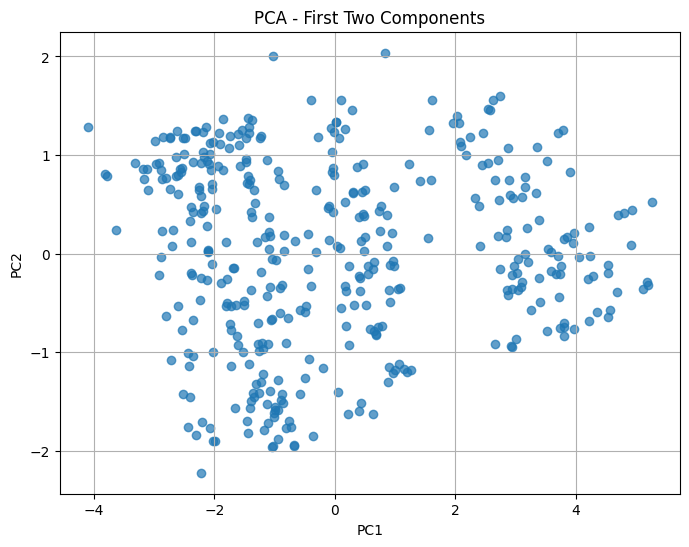

In [ ]:
pca_2 = PCA(n_components=2)
pca_2_comp = pca_2.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_2_comp[:, 0], pca_2_comp[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Components')
plt.grid()
plt.show()

**Observations:**
- PCA projection shows general structure but lacks clear clustering.
- Some spread is visible, but clusters are not distinctly separated.
- This confirms PCA’s strength lies in dimensionality reduction, not cluster discovery.
 but does not strongly separate natural clusters.

## **t-SNE**

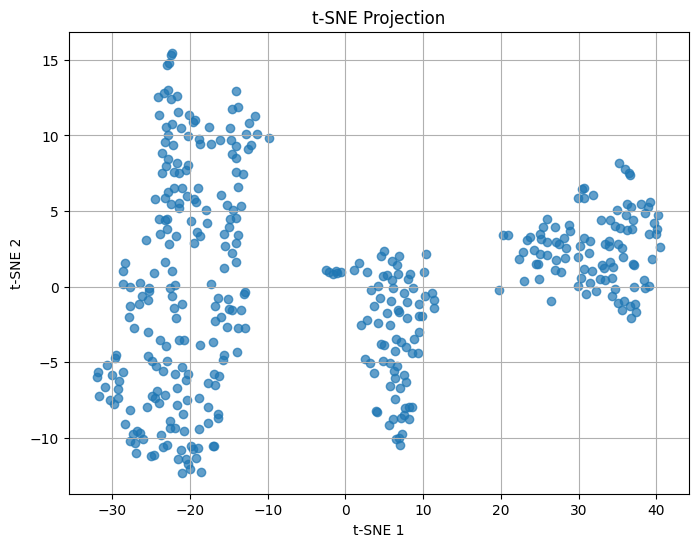

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7)
plt.title('t-SNE Projection')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid()
plt.show()


**Observations:**
- t-SNE reveals more distinct, compact clusters compared to PCA.
- It better captures hidden structure in high-dimensional space.
- Clear cluster separation supports its use for visualizing potential groups.
 compared to PCA.


#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

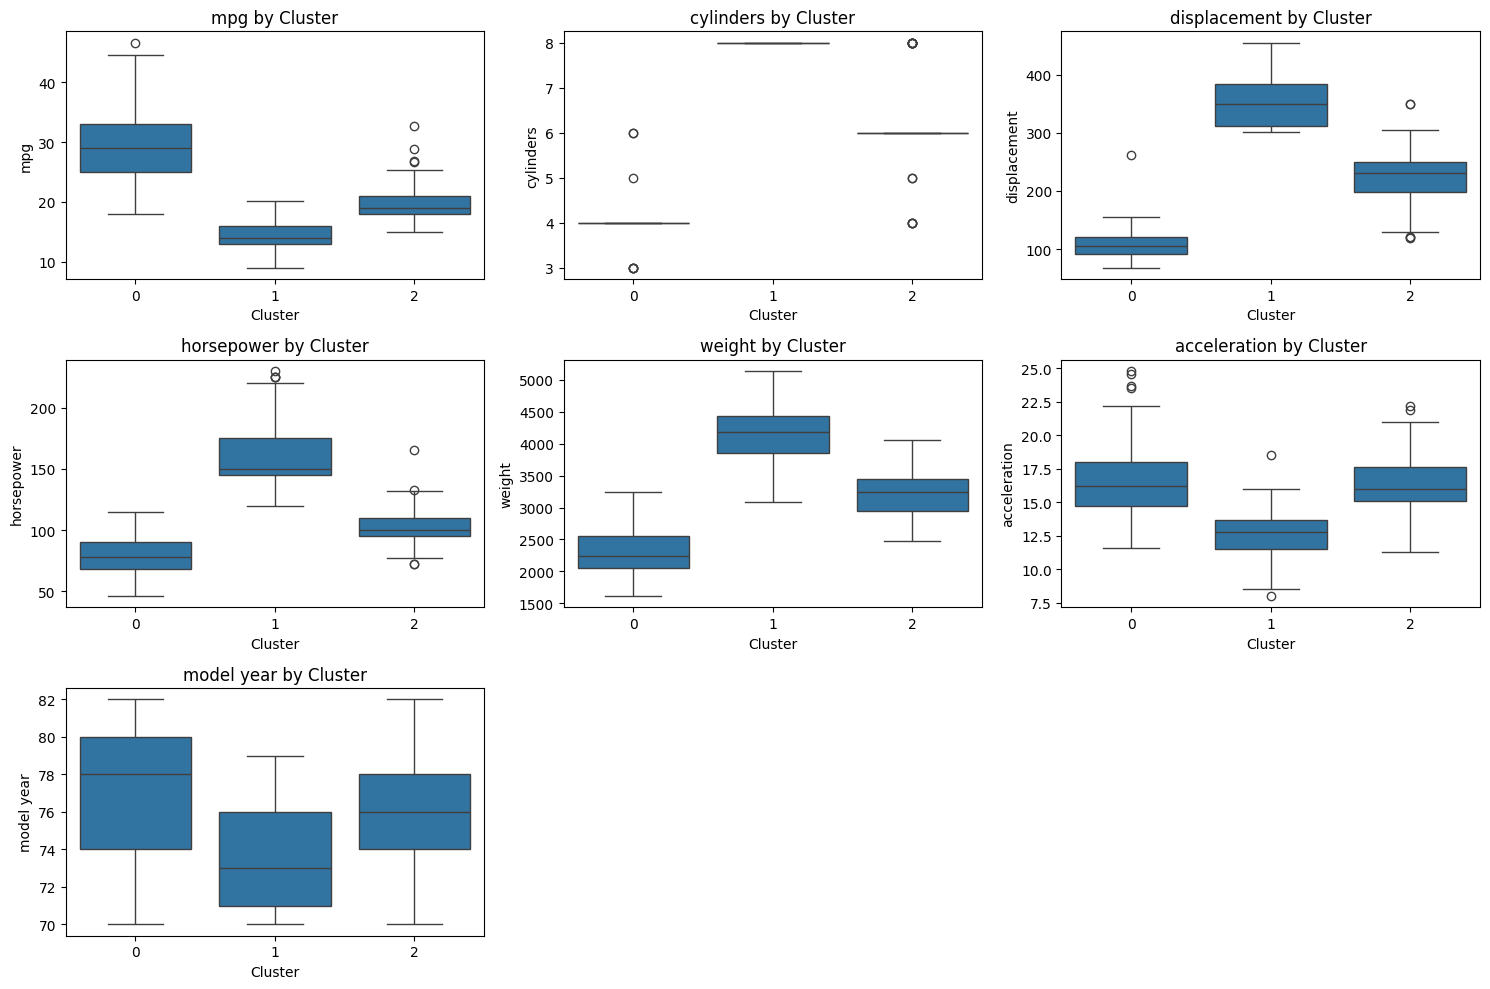

In [ ]:
df_clustered = pd.DataFrame(tsne_results, columns=['Dim1', 'Dim2'])
df_clustered = pd.concat([df_clustered, df_model.reset_index(drop=True)], axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clustered['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(15, 10))
for i, feature in enumerate(df_model.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df_clustered, x='Cluster', y=feature)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.show()

**Observations:**
- **Cluster 0**: Comprises cars with high displacement, horsepower, and weight — these are likely performance or muscle cars.
- **Cluster 1**: Consists of lightweight, low-horsepower cars with high mpg — these represent economical, fuel-efficient vehicles.
- **Cluster 2**: Represents cars with moderate values across most features — possibly general-purpose or family sedans.
- These clusters demonstrate clear segmentation that can inform marketing, pricing, and inventory strategies.

## **Actionable Insights and Recommendations**

**Write your insights and recommendations here:**

Actionable Insights:
1. PCA reduced the data dimensions effectively to 2–4 features.
2. t-SNE helped visualize distinct clusters, highlighting customer segments.
3. Clusters align with car types — performance, efficiency, and balanced.

Recommendations:
- SecondLife can use these clusters to tailor sales strategies.
- Efficient cars can be marketed to economy buyers.
- Performance clusters may attract enthusiasts.
- Data-driven segmentation helps optimize inventory and marketing.
